# Sandbox: 2D Poisson Equation 

In [2]:
import numpy as np
import scipy as sp 
import matplotlib.pyplot as plt

## Read/modify of submatrix of a given matrix

### Matrix Created using Arange

#Submatrix with a to (b-1) row as new rows,  c to (d-1) columns as new columns
A[a:b, c:d]  

In [5]:
A = np.ones((2,2))
print("matrix A =",A)

matrix A = [[1. 1.]
 [1. 1.]]


In [21]:
II = np.ix_([0,3],[0,3])
print(II)

(array([[0],
       [3]]), array([[0, 3]]))


In [23]:
I = np.array([2,3,4]); J = np.array([2,3,4])
II = np.ix_(I,J)
print(II)

(array([[2],
       [3],
       [4]]), array([[2, 3, 4]]))


In [26]:
A = np.ones((4,4))
B = 20*np.ones((2,2))
print("matrix A = ",A)
print("matrix B = ",B)
A[2:4,2:4] = B 
print("first modified matrix A = ",A)
I = np.array([2,3]); J = np.array([2,3])
II = np.ix_(I,J)
A[II] = 100*B
print("second modified matrix A = ",A)

matrix A =  [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
matrix B =  [[20. 20.]
 [20. 20.]]
first modified matrix A =  [[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1. 20. 20.]
 [ 1.  1. 20. 20.]]
second modified matrix A =  [[1.e+00 1.e+00 1.e+00 1.e+00]
 [1.e+00 1.e+00 1.e+00 1.e+00]
 [1.e+00 1.e+00 2.e+03 2.e+03]
 [1.e+00 1.e+00 2.e+03 2.e+03]]


In [7]:
# Create matrix to select a submatrix from 
A = np.arange(16).reshape(4,4)
print("submatrix A = ",A)

# Selection of submatrix with continguous rows and collumns 
B = A[0:2,1:2]
print("submatrix B = ", B)
A[0:2,1:2] = 20*np.ones(B.shape)
print("modified matrix A = ",A)

# Selection of submatrix specified by row and column indices 
I = [0,-1]; J = [0,-1]
C = A[I, :][:,J]
print("submatrix C = ",C)
D = 20*np.ones(C.shape)
print("submatrix D = ",D)  
# A[I, :][:,J] = D 
A[I, J] = D 
print("modified matrix A = ",A)

submatrix A =  [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
submatrix B =  [[1]
 [5]]
modified matrix A =  [[ 0 20  2  3]
 [ 4 20  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
submatrix C =  [[ 0  3]
 [12 15]]
submatrix D =  [[20. 20.]
 [20. 20.]]


ValueError: shape mismatch: value array of shape (2,2)  could not be broadcast to indexing result of shape (2,)

### Matrix Created Using Poisson1D 

In [8]:
def poisson_1d(N):
    h = 1/N; h2=h*h; 
    e = np.ones(N+1); 
    A = np.diag(-e[:-1],k=1)+np.diag(2*e)+np.diag(-e[:-1],k=-1); # tridiagonal matrix 
    A = (1/h2)*A; 
    A[0][0]=1; A[0][1]=0;     # handling left-most Dirchlet boundary condition 
    A[-1][-1]=1; A[-1][-2]=0; # handling right-most Dirchlet boundary condition 
    return A

N = 10; Np1 = N+1;

# define spatial mesh 
xvec = np.linspace(0,1,N+1)

# define matrix 
A1 = poisson_1d(N) 

print("original matrix A1 = ", A1)

I = [1,2,3,4,5]; J = [1,2,3,4,5];

B = A1[I, :][:,J]
print("submatrix B = ", B)
A1[I, :][:,J] = 20*np.ones(B.shape)

print("modified matrix A1 = ", A1) 

original matrix A1 =  [[   1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [-100.  200. -100.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0. -100.  200. -100.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0. -100.  200. -100.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0. -100.  200. -100.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0. -100.  200. -100.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0. -100.  200. -100.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0. -100.  200. -100.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0. -100.  200. -100.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0. -100.  200. -100.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.]]
submatrix B =  [[ 200. -100.    0.    0.    0.]
 [-100.  200. -100.    0.    0.]
 [   0. -100.  200. -100.    0.]
 [   0.    0. -100.  200. -100.]
 [   0.    0.    0. -100.  200.]]
modified matrix A1 =  [[   1.    0.  

In [14]:
N = 3; Np1 = N+1; 
A = np.zeros((Np1,Np1)); A[1:-1,1:-1]=-1;
Avec = np.reshape(A,Np1**2)
Iint = np.argwhere(Avec == -1); Ibnd = np.argwhere(Avec == 0)
print(Iint)
print(Ibnd)

[[ 5]
 [ 6]
 [ 9]
 [10]]
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 7]
 [ 8]
 [11]
 [12]
 [13]
 [14]
 [15]]


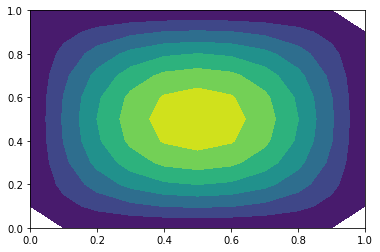

In [60]:
def poisson_1d(N):
    h = 1/N; h2=h*h; 
    e = np.ones(N+1); 
    A = np.diag(-e[:-1],k=1)+np.diag(2*e)+np.diag(-e[:-1],k=-1); # tridiagonal matrix 
    A = (1/h2)*A; 
    A[0][0]=1; A[0][1]=0;     # handling left-most Dirchlet boundary condition 
    A[-1][-1]=1; A[-1][-2]=0; # handling right-most Dirchlet boundary condition 
    return A

def mark_boundary(N):
    A = np.zeros((Np1,Np1)); A[1:-1,1:-1]=-1;
    Avec = np.reshape(A,Np1**2)
    Iint = np.argwhere(Avec == -1); Ibnd = np.argwhere(Avec == 0)
    return Iint, Ibnd

N = 10; Np1 = N+1;

# define spatial mesh 
xvec = np.linspace(0,1,N+1)

# define matrix 
A1 = poisson_1d(N) 
Iint, Ibnd = mark_boundary(N)
I1 = np.identity(Np1)
A  = np.kron(A1,I1) + np.kron(I1,A1); 

# define rhs-vector 
xx, yy = np.meshgrid(xvec, xvec)
ff = xx*(xx-1)*yy*(yy-1)
fvec = np.reshape(ff,Np1**2)

# handle the boundary conditions in A 
IJ = np.ix_(Ibnd[:,0],Ibnd[:,0]); A[IJ] = np.identity(Ibnd[:,0].size); 
IJ = np.ix_(Ibnd[:,0],Iint[:,0]); A[IJ] = np.zeros((Ibnd[:,0].size,Iint[:,0].size)) 

# solve linear system for u 
u = np.linalg.solve(A,fvec)

uu = np.reshape(u, (Np1, Np1))

h = plt.contourf(xvec,xvec,uu)

In [56]:
?np.reshape

In [55]:
def poisson_1d(N):
    h = 1/N; h2=h*h; 
    e = np.ones(N+1); 
    A = np.diag(-e[:-1],k=1)+np.diag(2*e)+np.diag(-e[:-1],k=-1); # tridiagonal matrix 
    A = (1/h2)*A; 
    A[0][0]=1; A[0][1]=0;     # handling left-most Dirchlet boundary condition 
    A[-1][-1]=1; A[-1][-2]=0; # handling right-most Dirchlet boundary condition 
    return A

def mark_boundary(N):
    A = np.zeros((Np1,Np1)); A[1:-1,1:-1]=-1;
    Avec = np.reshape(A,Np1**2)
    Iint = np.argwhere(Avec == -1); Ibnd = np.argwhere(Avec == 0)
    return Iint, Ibnd

N = 3; Np1 = N+1;

# define spatial mesh 
xvec = np.linspace(0,1,N+1)

# define matrix 
A1 = poisson_1d(N) 
Iint, Ibnd = mark_boundary(N)
I1 = np.identity(Np1)
A  = np.kron(A1,I1) + np.kron(I1,A1)
print(Ibnd[1])
print(A[Ibnd,Ibnd].shape)

[1]
(12, 1)


In [59]:
?np.arange

In [76]:
# submatrix selection 
B = np.arange(16).reshape(4,4)
print(B)

D = B[0:2,0:2]
print(D)

I = [0,1,3]; J = [0,1,2,3]
E = B[I, :][:,J]
print(E)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[0 1]
 [4 5]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [12 13 14 15]]


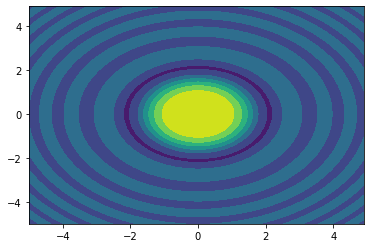

In [56]:
# for the right-hand vector 
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
h = plt.contourf(x,y,z)

In [90]:
?np.slice

Object `np.slice` not found.


In [114]:
print(0:3)

SyntaxError: invalid syntax (<ipython-input-114-b55870bed798>, line 1)